# Исследование рынка общественного питания в Москве: анализ и рекомендации для нового заведения

##  Цели и задачи проекта

Целью данного проекта является проведение всестороннего исследовательского анализа рынка общественного питания в Москве с целью предоставления рекомендаций для открытия нового заведения. Заказчики, инвесторы фонда Shut Up and Take My Money, стремятся определить тип заведения (кафе, ресторан, бар), его расположение, меню и ценовую политику. В процессе работы над проектом будет необходимо решить следующие задачи:

- провести анализ текущего состояния рынка общественного питания в Москве, включая категории заведений, их размещение и популярность;
- изучить потребительские предпочтения и тенденции, влияющие на выбор типа заведения;
- определить наиболее перспективные районы Москвы для открытия нового заведения;
- сформулировать рекомендации по созданию уникального предложения для целевой аудитории.

##  Описание данных

В рамках анализа будет использоваться датасет, содержащий информацию о заведениях общественного питания в Москве. Данные собраны на основании сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация в файле /datasets/rest_info.csv включает следующие поля:

- name: название заведения;
- address: адрес заведения;
- district: административный район, в котором находится заведение, например, Центральный административный округ;
- category: категория заведения, представляющая собой его тип (кафе, ресторан, бар и т.д.);
Кроме того, может быть включена информация о популярных метриках, таких как средняя оценка пользователей и количество отзывов, чтобы помочь лучше понять текущее положение заведений на рынке.

####  Загрузка данных и знакомство с ними

In [38]:
!pip install phik -U


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# Загружаем библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik 

In [40]:
# Выводим и анализируем тип данных о заведениях общественного питания Москвы

rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

rest_info.info()
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   mi

In [41]:
# Объединяем две таблицы
restorans= pd.merge(rest_info, rest_price, on='id', how='outer')

# Вывод обоих фреймов данных в виде таблицы
pd.DataFrame(restorans)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0009f005d6fb47c6b067db5084f4e05a,Кафе Лоза,ресторан,"Москва, Череповецкая улица, 4А",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,85.0,средние,Средний счёт:500–800 ₽,650.0,NaN
1,000c4f8e2c6b4a8e81127ed094688658,ДоброЛавка,кофейня,"Москва, Столярный переулок, 3к13",Центральный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.4,0,NaN,средние,Цена чашки капучино:150–190 ₽,NaN,170.0
2,0028eb1543284e18a0acdb0343a66107,Кафе Бульвар. Шашлык-Сити,кафе,"Москва, 7-я Парковая улица, 15, стр. 3",Восточный административный округ,"ежедневно, 11:00–00:00",4.3,0,NaN,NaN,NaN,NaN,NaN
3,002a2a1a30b84ad1883408ad5cec661f,Булошная,кофейня,"Москва, Новочерёмушкинская улица, 58",Юго-Западный административный округ,"ежедневно, 09:00–22:00",4.4,1,20.0,NaN,NaN,NaN,NaN
4,002c7e0b7c294daf944229bc10597566,J&j Cafe Moscow,кофейня,"Москва, Верхняя Красносельская улица, 16",Центральный административный округ,пн-пт 09:00–18:00,4.1,0,NaN,средние,Цена чашки капучино:170–250 ₽,NaN,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,ffd6e4cb38004c85b156add4e6d94c7c,Хинкали point,ресторан,"Москва, Лесная улица, 20с1",Центральный административный округ,"пн-пт 10:00–23:00; сб,вс 12:00–23:00",4.5,0,NaN,NaN,NaN,NaN,NaN
8402,ffd9e673074546758066206a74c6b5a0,Madison Restaurant & Club,ресторан,"Москва, Ленинградский проспект, 31А",Северный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–05:00",4.4,0,NaN,высокие,Средний счёт:2500–3500 ₽,3000.0,NaN
8403,ffda7a385ab34248ba4fddfcb653dbac,Вкус Азербайджана,кафе,"Москва, Велозаводская улица, 13, стр. 1",Юго-Восточный административный округ,"ежедневно, 09:00–21:00",4.1,0,NaN,NaN,Средний счёт:500 ₽,500.0,NaN
8404,ffe1ca40df284b4094b6cf051b45e4ac,Лебяжье,ресторан,"Москва, Майский просек, 2",Восточный административный округ,"ежедневно, 11:00–23:00",4.9,0,NaN,NaN,NaN,NaN,NaN


##### Выводы:

Объединенный датасет содержит 8406 строк и 13 колонок. Анализируемые данные соответвсуют их описанию, используются верные типы данных. Пропущенные значения встречаются в 5 столбцах seats, price, avg_bill, middle_avg_bill, middle_coffee_cup. 

####  Предобработка данных

In [42]:
# Подсчитываем пропущенные значения в каждом столбце
missing_values = restorans.isna().sum()

# Считаем относительное количество пропусков
relative_missing = (restorans.isnull().mean() * 100).round(2)


# Объединяем данные в один DataFrame
missing_summary = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Относительное количество пропусков (%)': relative_missing
})

# Выводим результат
print(missing_summary)

                   Количество пропусков  \
id                                    0   
name                                  0   
category                              0   
address                               0   
district                              0   
hours                               536   
rating                                0   
chain                                 0   
seats                              3611   
price                              5091   
avg_bill                           4590   
middle_avg_bill                    5257   
middle_coffee_cup                  7871   

                   Относительное количество пропусков (%)  
id                                                   0.00  
name                                                 0.00  
category                                             0.00  
address                                              0.00  
district                                             0.00  
hours                                

In [43]:
# Определяем категориальные столбцы
categorical_columns = ['price', 'avg_bill']

# Заменяем пропуски на "Нет данных" в категориальных столбцах
for col in categorical_columns:
    restorans[col] = restorans[col].fillna("Нет данных")

# Проверяем количество пропущенных значений после обработки
missing_values_after = restorans.isna().sum()

print('Количество пропущенных значений после обработки:')
print(missing_values_after)

# Печатаем DataFrame
pd.DataFrame(restorans)


Количество пропущенных значений после обработки:
id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0009f005d6fb47c6b067db5084f4e05a,Кафе Лоза,ресторан,"Москва, Череповецкая улица, 4А",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,85.0,средние,Средний счёт:500–800 ₽,650.0,NaN
1,000c4f8e2c6b4a8e81127ed094688658,ДоброЛавка,кофейня,"Москва, Столярный переулок, 3к13",Центральный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.4,0,NaN,средние,Цена чашки капучино:150–190 ₽,NaN,170.0
2,0028eb1543284e18a0acdb0343a66107,Кафе Бульвар. Шашлык-Сити,кафе,"Москва, 7-я Парковая улица, 15, стр. 3",Восточный административный округ,"ежедневно, 11:00–00:00",4.3,0,NaN,Нет данных,Нет данных,NaN,NaN
3,002a2a1a30b84ad1883408ad5cec661f,Булошная,кофейня,"Москва, Новочерёмушкинская улица, 58",Юго-Западный административный округ,"ежедневно, 09:00–22:00",4.4,1,20.0,Нет данных,Нет данных,NaN,NaN
4,002c7e0b7c294daf944229bc10597566,J&j Cafe Moscow,кофейня,"Москва, Верхняя Красносельская улица, 16",Центральный административный округ,пн-пт 09:00–18:00,4.1,0,NaN,средние,Цена чашки капучино:170–250 ₽,NaN,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,ffd6e4cb38004c85b156add4e6d94c7c,Хинкали point,ресторан,"Москва, Лесная улица, 20с1",Центральный административный округ,"пн-пт 10:00–23:00; сб,вс 12:00–23:00",4.5,0,NaN,Нет данных,Нет данных,NaN,NaN
8402,ffd9e673074546758066206a74c6b5a0,Madison Restaurant & Club,ресторан,"Москва, Ленинградский проспект, 31А",Северный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–05:00",4.4,0,NaN,высокие,Средний счёт:2500–3500 ₽,3000.0,NaN
8403,ffda7a385ab34248ba4fddfcb653dbac,Вкус Азербайджана,кафе,"Москва, Велозаводская улица, 13, стр. 1",Юго-Восточный административный округ,"ежедневно, 09:00–21:00",4.1,0,NaN,Нет данных,Средний счёт:500 ₽,500.0,NaN
8404,ffe1ca40df284b4094b6cf051b45e4ac,Лебяжье,ресторан,"Москва, Майский просек, 2",Восточный административный округ,"ежедневно, 11:00–23:00",4.9,0,NaN,Нет данных,Нет данных,NaN,NaN


In [44]:
# Подсчитываем количество дубликатов по всем столбцам
duplicates = restorans.duplicated().sum()
print(f'Количество явных дубликатов в данных: {duplicates}')

Количество явных дубликатов в данных: 0


In [45]:
# Нормализуем данные: приводим поля "наименование" и "адрес" к общему регистру, удаляем все пробельные символы слева и справа от строки
restorans['name'] = restorans['name'].str.upper().str.strip()
restorans['address'] = restorans['address'].str.upper().str.strip()
(restorans)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0009f005d6fb47c6b067db5084f4e05a,КАФЕ ЛОЗА,ресторан,"МОСКВА, ЧЕРЕПОВЕЦКАЯ УЛИЦА, 4А",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,85.0,средние,Средний счёт:500–800 ₽,650.0,NaN
1,000c4f8e2c6b4a8e81127ed094688658,ДОБРОЛАВКА,кофейня,"МОСКВА, СТОЛЯРНЫЙ ПЕРЕУЛОК, 3К13",Центральный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.4,0,NaN,средние,Цена чашки капучино:150–190 ₽,NaN,170.0
2,0028eb1543284e18a0acdb0343a66107,КАФЕ БУЛЬВАР. ШАШЛЫК-СИТИ,кафе,"МОСКВА, 7-Я ПАРКОВАЯ УЛИЦА, 15, СТР. 3",Восточный административный округ,"ежедневно, 11:00–00:00",4.3,0,NaN,Нет данных,Нет данных,NaN,NaN
3,002a2a1a30b84ad1883408ad5cec661f,БУЛОШНАЯ,кофейня,"МОСКВА, НОВОЧЕРЁМУШКИНСКАЯ УЛИЦА, 58",Юго-Западный административный округ,"ежедневно, 09:00–22:00",4.4,1,20.0,Нет данных,Нет данных,NaN,NaN
4,002c7e0b7c294daf944229bc10597566,J&J CAFE MOSCOW,кофейня,"МОСКВА, ВЕРХНЯЯ КРАСНОСЕЛЬСКАЯ УЛИЦА, 16",Центральный административный округ,пн-пт 09:00–18:00,4.1,0,NaN,средние,Цена чашки капучино:170–250 ₽,NaN,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,ffd6e4cb38004c85b156add4e6d94c7c,ХИНКАЛИ POINT,ресторан,"МОСКВА, ЛЕСНАЯ УЛИЦА, 20С1",Центральный административный округ,"пн-пт 10:00–23:00; сб,вс 12:00–23:00",4.5,0,NaN,Нет данных,Нет данных,NaN,NaN
8402,ffd9e673074546758066206a74c6b5a0,MADISON RESTAURANT & CLUB,ресторан,"МОСКВА, ЛЕНИНГРАДСКИЙ ПРОСПЕКТ, 31А",Северный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–05:00",4.4,0,NaN,высокие,Средний счёт:2500–3500 ₽,3000.0,NaN
8403,ffda7a385ab34248ba4fddfcb653dbac,ВКУС АЗЕРБАЙДЖАНА,кафе,"МОСКВА, ВЕЛОЗАВОДСКАЯ УЛИЦА, 13, СТР. 1",Юго-Восточный административный округ,"ежедневно, 09:00–21:00",4.1,0,NaN,Нет данных,Средний счёт:500 ₽,500.0,NaN
8404,ffe1ca40df284b4094b6cf051b45e4ac,ЛЕБЯЖЬЕ,ресторан,"МОСКВА, МАЙСКИЙ ПРОСЕК, 2",Восточный административный округ,"ежедневно, 11:00–23:00",4.9,0,NaN,Нет данных,Нет данных,NaN,NaN


In [46]:
# Проверяем количество дубликатов после нормализации
duplicates = restorans.duplicated().sum()
print(f'Количество явных дубликатов в данных: {duplicates}')

Количество явных дубликатов в данных: 0


In [47]:
# СЧИТАЕМ КОЛИЧЕСТВО НЕЯВНЫХ ДУБЛИКАТОВ

# Выбор столбцов для анализа
columns_to_check = ['name', 'address', 'rating']

# Определение дубликатов
duplicates = restorans.duplicated(subset=columns_to_check)

# Количество дублированных записей
print(f'Количество дублирующихся записей: {sum(duplicates)}')

# Вывод всех дублирующих записей
if sum(duplicates) > 0:
    print(restorans[duplicates])

Количество дублирующихся записей: 4
                                    id                       name  category  \
4466  897ddbc6746c4388b19dc8a9fcdbb488                       КАФЕ      кафе   
5432  a69f018d5c064873a3b491b0121bc1b4                  MORE POKE  ресторан   
6474  c6ef39ae8a8c483d8f9a6531bc386a2c  РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ  ресторан   
6903  d3116844e4e048f99614eb30be3214e0            ХЛЕБ ДА ВЫПЕЧКА      кафе   

                                      address  \
4466             МОСКВА, ПАРК АНГАРСКИЕ ПРУДЫ   
5432  МОСКВА, ВОЛОКОЛАМСКОЕ ШОССЕ, 11, СТР. 2   
6474               МОСКВА, ПРОСПЕКТ МИРА, 118   
6903              МОСКВА, ЯРЦЕВСКАЯ УЛИЦА, 19   

                                     district  \
4466          Северный административный округ   
5432          Северный административный округ   
6474  Северо-Восточный административный округ   
6903          Западный административный округ   

                                                  hours  rating  chain  seat

In [48]:
# Выбор столбцов для проверки на дубликаты
columns_to_check = ['name', 'address', 'rating']

# Удаляем дубликаты
restorans.drop_duplicates(subset=columns_to_check, inplace=True)

# Пересчитываем дубликаты после удаления
duplicates = restorans.duplicated(subset=columns_to_check)

# Выводим количество оставшихся дубликатов
print(f'Количество дублирующихся записей: {sum(duplicates)}')

# Выводим оставшиеся дублирующие записи, если есть
if sum(duplicates) > 0:
    print(restorans[duplicates])

Количество дублирующихся записей: 0


In [49]:
# Создаем новый столбец is_24_7
restorans['is_24_7'] = restorans['hours'].str.contains('ежедневно, круглосуточно', na=False)

# Вывод результата
(restorans)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0009f005d6fb47c6b067db5084f4e05a,КАФЕ ЛОЗА,ресторан,"МОСКВА, ЧЕРЕПОВЕЦКАЯ УЛИЦА, 4А",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,85.0,средние,Средний счёт:500–800 ₽,650.0,NaN,True
1,000c4f8e2c6b4a8e81127ed094688658,ДОБРОЛАВКА,кофейня,"МОСКВА, СТОЛЯРНЫЙ ПЕРЕУЛОК, 3К13",Центральный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.4,0,NaN,средние,Цена чашки капучино:150–190 ₽,NaN,170.0,False
2,0028eb1543284e18a0acdb0343a66107,КАФЕ БУЛЬВАР. ШАШЛЫК-СИТИ,кафе,"МОСКВА, 7-Я ПАРКОВАЯ УЛИЦА, 15, СТР. 3",Восточный административный округ,"ежедневно, 11:00–00:00",4.3,0,NaN,Нет данных,Нет данных,NaN,NaN,False
3,002a2a1a30b84ad1883408ad5cec661f,БУЛОШНАЯ,кофейня,"МОСКВА, НОВОЧЕРЁМУШКИНСКАЯ УЛИЦА, 58",Юго-Западный административный округ,"ежедневно, 09:00–22:00",4.4,1,20.0,Нет данных,Нет данных,NaN,NaN,False
4,002c7e0b7c294daf944229bc10597566,J&J CAFE MOSCOW,кофейня,"МОСКВА, ВЕРХНЯЯ КРАСНОСЕЛЬСКАЯ УЛИЦА, 16",Центральный административный округ,пн-пт 09:00–18:00,4.1,0,NaN,средние,Цена чашки капучино:170–250 ₽,NaN,210.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,ffd6e4cb38004c85b156add4e6d94c7c,ХИНКАЛИ POINT,ресторан,"МОСКВА, ЛЕСНАЯ УЛИЦА, 20С1",Центральный административный округ,"пн-пт 10:00–23:00; сб,вс 12:00–23:00",4.5,0,NaN,Нет данных,Нет данных,NaN,NaN,False
8402,ffd9e673074546758066206a74c6b5a0,MADISON RESTAURANT & CLUB,ресторан,"МОСКВА, ЛЕНИНГРАДСКИЙ ПРОСПЕКТ, 31А",Северный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–05:00",4.4,0,NaN,высокие,Средний счёт:2500–3500 ₽,3000.0,NaN,False
8403,ffda7a385ab34248ba4fddfcb653dbac,ВКУС АЗЕРБАЙДЖАНА,кафе,"МОСКВА, ВЕЛОЗАВОДСКАЯ УЛИЦА, 13, СТР. 1",Юго-Восточный административный округ,"ежедневно, 09:00–21:00",4.1,0,NaN,Нет данных,Средний счёт:500 ₽,500.0,NaN,False
8404,ffe1ca40df284b4094b6cf051b45e4ac,ЛЕБЯЖЬЕ,ресторан,"МОСКВА, МАЙСКИЙ ПРОСЕК, 2",Восточный административный округ,"ежедневно, 11:00–23:00",4.9,0,NaN,Нет данных,Нет данных,NaN,NaN,False


#####  Выводы:

В процессе предобработки данных было выполнено несколько шагов для подготовки и очистки набора данных. Во-первых, был проведен подсчет пропущенных значений в каждом столбце, что позволило выявить отсутствующие данные. Затем в категориальных столбцах пустые ячейки были заполнены значением "Нет данных". После этой процедуры было повторно проведено вычисление количества пропущенных значений для подтверждения успешности обработки. Дополнительно был выполнен подсчет явных и неявных дубликатов по всем столбцам, и установлено, что неявных дублирующих записей в наборе - 4 и они успешно удалены. 

Далее данные были нормализованы путем приведения полей "наименование" и "адрес" к одному регистру и удаления лишних пробелов слева и справа от строки. После нормализации вновь был произведен подсчет дубликатов, подтвердивший их отсутствие. Завершающим этапом стало создание нового столбца is_24_7, который идентифицирует рестораны, работающие ежедневно или круглосуточно.

Также был проведен анализ основных проблемных областей:

График работы (hours):
Пропуск данных в этом столбце может быть обусловлен отсутствием информации о рабочем расписании некоторых заведений. Возможно, эти сведения не были предоставлены владельцами ресторанов или отсутствуют в оригинальном источнике данных.

Количество мест (seats):
Отсутствие данных о количестве посадочных мест может указывать на неполную доступность информации об вместимости ресторанов. Некоторые заведения могли предоставить только ориентировочное количество мест или вовсе не указали данную информацию.

Цена (price):
Пропуски в этом столбце могут свидетельствовать о том, что цены на блюда или услуги не были указаны для отдельных ресторанов. Возможная причина — изменения в меню или недостаток информации в используемых источниках данных.

Средний счет (avg_bill, middle_avg_bill):
Недостающие данные по этому показателю могут говорить о том, что информация о среднем чеке отсутствует для ряда ресторанов. Владельцы могли не указать эту информацию или она могла быть упущена при сборе данных.

Стоимость чашки кофе (middle_coffee_cup):
Значительная доля пропусков в этом столбце предполагает, что стоимость чашки кофе не была указана для многих ресторанов. Возможно, не все заведения предлагают кофе или не предоставляли эту информацию.


####  Исследовательский анализ данных

#####  1. Исследуем количество объектов общественного питания по каждой категории.

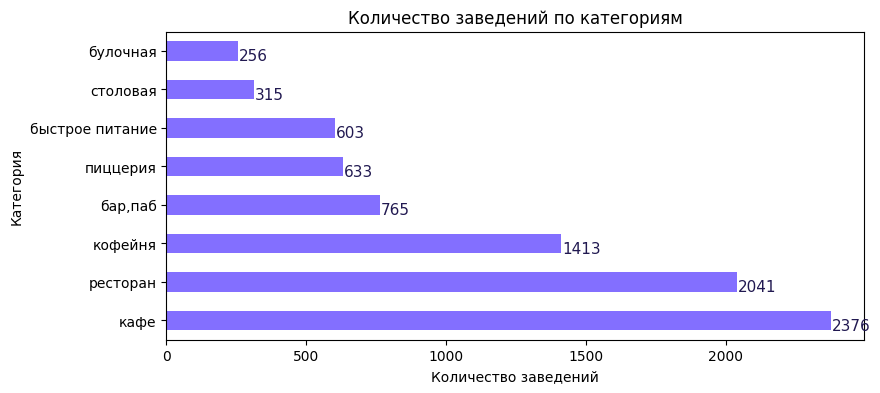

In [50]:
# Подсчет количества заведений по категориям
category_count = restorans['category'].value_counts()
# Построение столбчатой диаграммы
plt.figure(figsize=(9, 4))  
category_count.plot(kind='barh', color='#836FFF') 

# Добавление меток данных
for i, v in enumerate(category_count):
    plt.text(v + 3, i - 0.25, str(v), color='#211951', fontsize=11)

plt.xlabel('Количество заведений')  
plt.ylabel('Категория')  
plt.title('Количество заведений по категориям')  
plt.show()  # Показываем график

#####  Выводы:

Большинство заведений общественного питания в Москве составляют кафе (2378), рестораны (2043) и кофейни (1413), что подчеркивает популярность этих форматов среди горожан. Менее распространены бары, пиццерии и столовые.

#####  2. Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

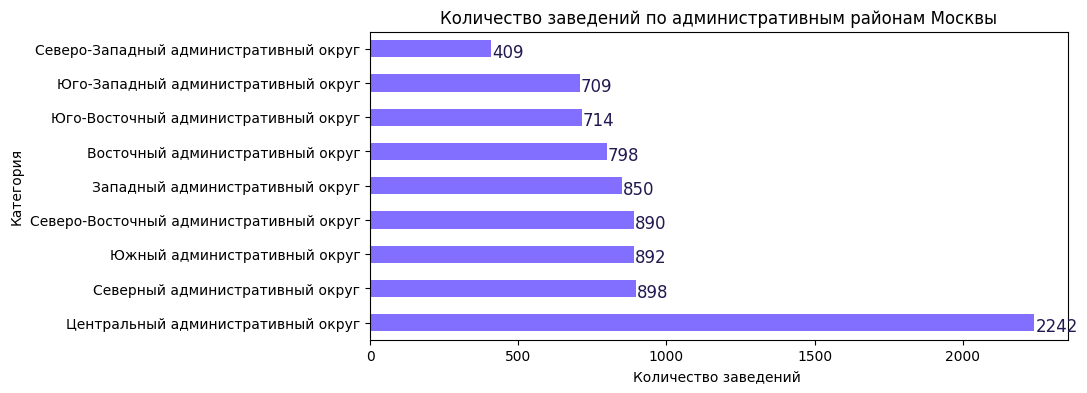

In [51]:
# Подсчет количества заведений по административным районам Москвы
district_category_count = restorans['district'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(9, 4))  
district_category_count.plot(kind='barh', color='#836FFF')

# Добавление меток данных
for i, v in enumerate(district_category_count):
    plt.text(v + 3, i - 0.25, str(v), color='#211951', fontsize=12)

plt.xlabel('Количество заведений ')  
plt.ylabel('Категория')  
plt.title('Количество заведений по административным районам Москвы')  
plt.show()  # Показываем график

#####  Выводы:

Центральный административный округ лидирует по количеству заведений общественного питания (2242), заметно опережая Северный и Южный округа. Остальные районы демонстрируют меньшую концентрацию, но сохраняют значительное присутствие точек общепита, отражая равномерное распределение по городу. Меньше всего общепита представлено в Северо-Западном округе (409).

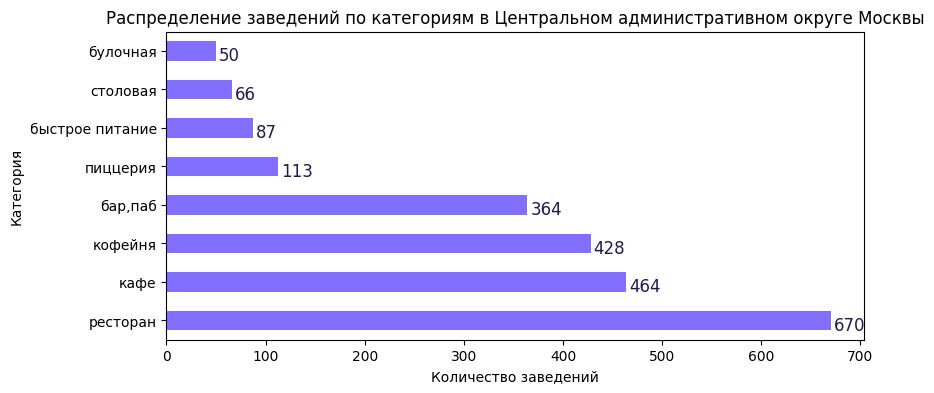

In [52]:

# Фильтрация данных по Центральному административному округу
central_district = restorans.query("district == 'Центральный административный округ'")

# Подсчет количества заведений каждой категории в Центральном административном округе
category_count_central = central_district['category'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(9,4))  
category_count_central.plot(kind='barh', color='#836FFF') 

# Добавление меток данных
for i, v in enumerate(category_count_central):
    plt.text(v + 3, i - 0.25, str(v), color='#211951', fontsize=12)

plt.xlabel('Количество заведений')
plt.ylabel('Категория')  
plt.title('Распределение заведений по категориям в Центральном административном округе Москвы') 
plt.show()

#####  Выводы:

В Центральном административном округе Москвы преобладают рестораны, кафе и кофейни, составляющие большинство заведений общественного питания. Наименее популярными являются булочные, столовые, фастфуды и пиццерии, что свидетельствует о предпочтениях жителей и гостей центра города в пользу более изысканных и разнообразных форматов заведений.

#####  3. Исследуем соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

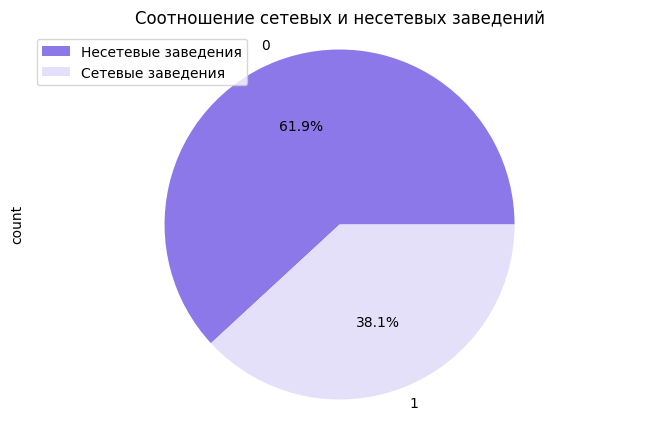

In [53]:
# Подсчет количества заведений по административным районам Москвы
chain_category_count = restorans['chain'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))  
chain_category_count.plot(kind='pie', colors=['#8C78E8', '#E5E0FA'], autopct='%1.1f%%')

# Функция для добавления меток данных
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', va='bottom', color='#211951', fontsize=12)

plt.title('Соотношение сетевых и несетевых заведений')
plt.legend(labels=['Несетевые заведения', 'Сетевые заведения'])
plt.axis('equal')  # Чтобы круг был действительно круглым

plt.show()

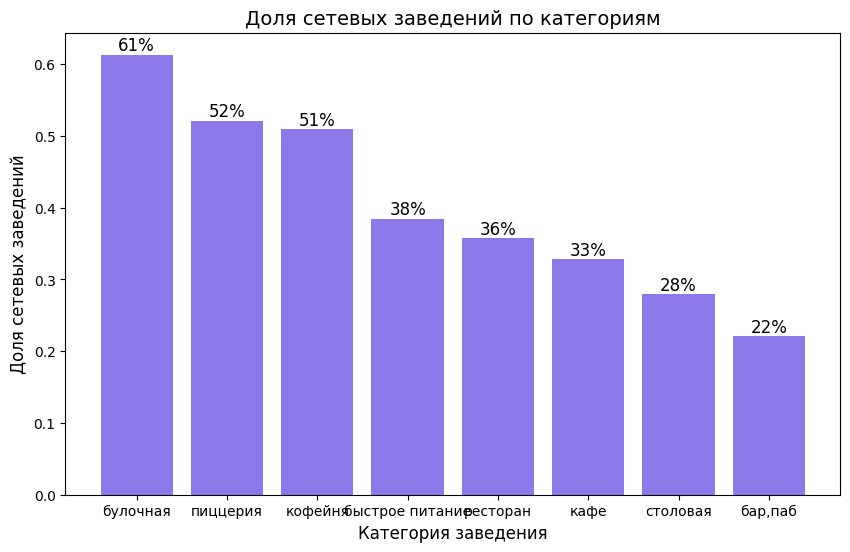

In [54]:
# Фильтрация сетевых заведений
network_df = restorans.query("chain == 1")

# Группировка по категориям и подсчет количества сетевых заведений
network_count_by_category = network_df.groupby(['category'])['name'].count()

# Общее количество заведений по категориям
total_count_by_category = restorans.groupby(['category'])['name'].count()

# Доля сетевых заведений
network_share = network_count_by_category / total_count_by_category

# Сортировка категорий по доле сетевых заведений
sorted_network_share = network_share.sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_network_share.index, sorted_network_share.values, color = '#8C78E8')

# Добавление подписей меток в процентах
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-позиция центра столбца
        height,                             # y-позиция вершины столбца
        f"{height * 100:.0f}%",             # значение в процентах с целым числом
        ha="center",                        
        va="bottom",                        
        color="k",                          
        fontsize=12                         
    )


# Настройки графика
plt.title('Доля сетевых заведений по категориям', fontsize=14)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Доля сетевых заведений', fontsize=12)
plt.show()

#####  Выводы:

Анализируя долю сетевых заведений по различным категориям, можно заметить, что наибольшая концентрация сетевых предприятий наблюдается в сегменте булочной (61%), пиццерии (52%) и кофейни (51%). Эти цифры указывают на высокую степень стандартизации и массовости бизнеса в данных сегментах рынка, что способствует развитию сетевой модели. В то же время такие категории, как ресторан (36%), кафе (33%) и особенно бар, паб (22%), демонстрируют меньшую склонность к сетевому формату, вероятно, из-за большей ориентации на уникальные концепции и индивидуальный подход к клиентам.

#####  4. Исследуем количество посадочных мест в заведениях и приводим для каждой категории заведений наиболее типичное для него количество посадочных мест.

In [55]:
# Группировка по категориям и расчет медианы
category_median_seats = restorans.groupby('category')['seats'].median()

# Вывод результатов
print('Расчет медианы посадочных мест в разрезе категорий:')
print(category_median_seats)

print('Статистический расчет:')
restorans['seats'].describe()


Расчет медианы посадочных мест в разрезе категорий:
category
бар,паб            82.5
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64
Статистический расчет:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

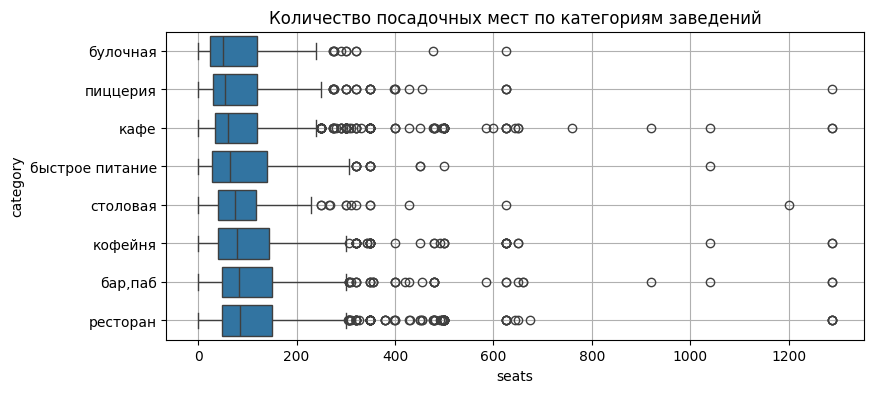

In [56]:
# Группировка по категориям и расчет медианы для каждого
median_seats_by_category = restorans.groupby('category')['seats'].median()

# Создание списка отсортированных категорий
restorans_sort = median_seats_by_category.sort_values().index

# Построение boxplot с отсортированными данными
plt.figure(figsize=(9, 4))
sns.boxplot(y='category', x='seats', data=restorans, order=restorans_sort)

# Настройка графиков
plt.title('Количество посадочных мест по категориям заведений')
plt.grid()
plt.show()

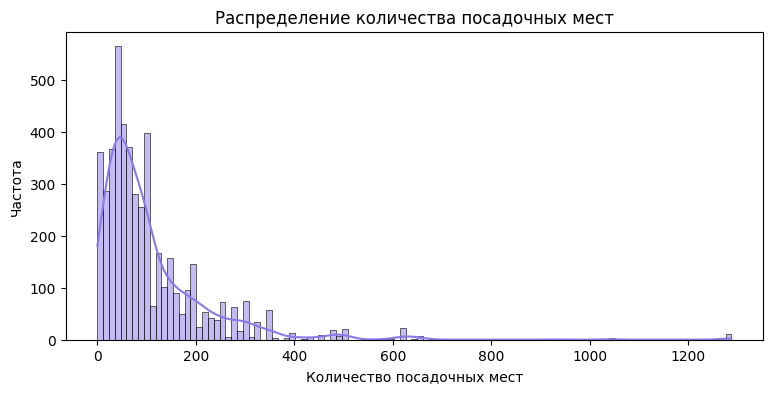

In [57]:

plt.figure(figsize=(9, 4))
sns.histplot(restorans['seats'], color='#8C78E8', kde=True)
plt.title("Распределение количества посадочных мест")
plt.xlabel("Количество посадочных мест")
plt.ylabel("Частота")
plt.show()

#####  Выводы:

Медиана посадочных мест: Медиана количества посадочных мест варьируется в зависимости от категории заведения. Наибольшее среднее количество мест наблюдается в ресторанах (86 мест), барах/пулах (82.5 места) и кофейнях (80.0 мест). Наименьшее число мест характерно для булочной (50 мест) и пиццерии (55 мест).
Общий статистический анализ: Среднее количество посадочных мест среди всех заведений составляет около 108 мест, однако медиана всего лишь 75 мест, что свидетельствует о наличии значительного разброса данных. Максимальное количество мест достигает 1288, что говорит о существовании крупных заведений.
Эти данные указывают на значительное разнообразие размеров заведений различных типов, где рестораны, бары и столовые имеют тенденцию быть более вместительными, тогда как булочные и пиццерии чаще представлены небольшими заведениями.

#####  5. Исследуем рейтинги заведений.

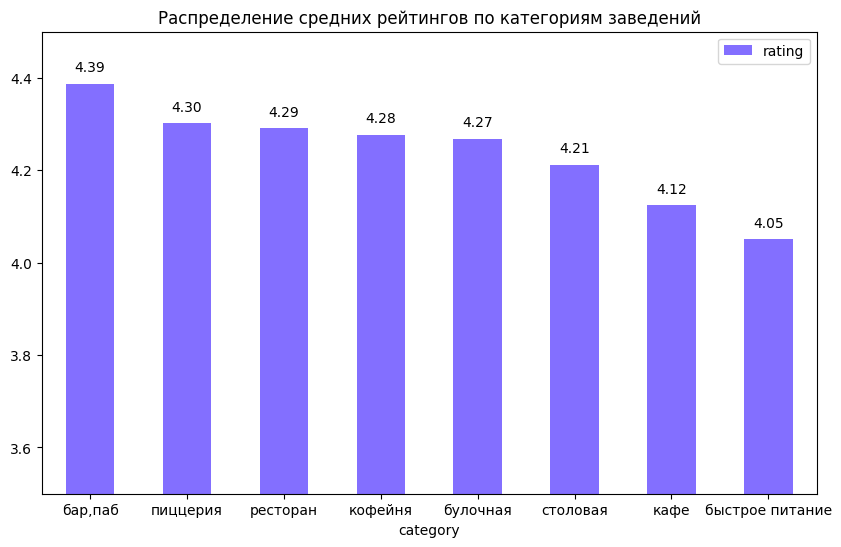

In [58]:
# Группировка данных по категориям и расчет среднего рейтинга
ratings_by_category = restorans.groupby('category')['rating'].mean().reset_index()

# Сортировка по убыванию среднего рейтинга
ratings_by_category = ratings_by_category.sort_values(by='rating', ascending=False)

# Построение графика
ax = ratings_by_category.plot(kind='bar', 
               title='Распределение средних рейтингов по категориям заведений', 
               x='category', 
               y='rating', 
               rot=0, 
               color= '#836FFF', 
               figsize=(10, 6))

# Установка диапазона по оси Y
plt.ylim(3.5, 4.5)

# Добавление меток данных
for i in range(len(ratings_by_category)):
    ax.text(i, ratings_by_category['rating'].iloc[i] + 0.02, 
            f"{ratings_by_category['rating'].iloc[i]:.2f}", 
            ha='center', va='bottom')

plt.show()

#####  Выводы:

Анализ средних рейтингов различных типов общепита показывает незначительные различия между категориями. Рейтинги варьируются в пределах от 4.05 ("быстрое питание") до 4.39 ("бар, паб"), что составляет разницу менее 0.34 балла. Эти результаты свидетельствуют о том, что большинство типов заведений получают схожие оценки клиентов, хотя небольшие отклонения присутствуют. 

#####  6. Выявляем корреляцию рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.

interval columns not set, guessing: ['chain', 'seats']


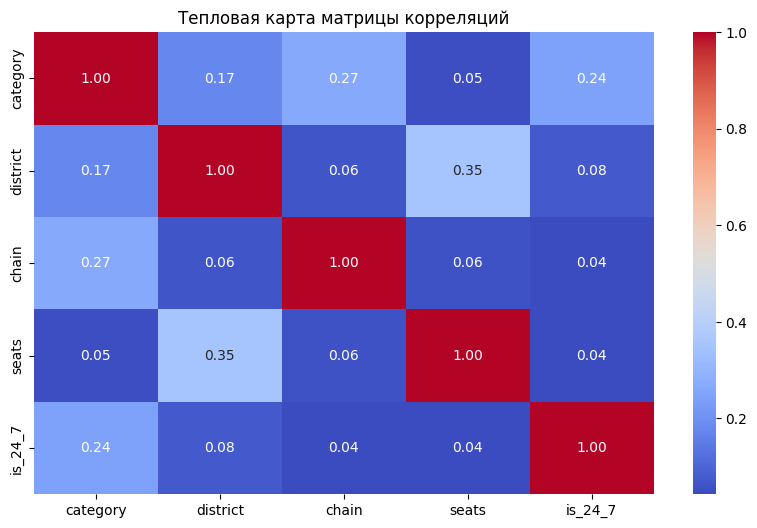

In [59]:

matrix = restorans[['category', 'district', 'chain', 'seats', 'is_24_7']]. phik_matrix()

# Построим диаграмму рассеивания
plt.figure(figsize=(10, 6))
sns.heatmap(data=matrix, annot = True, fmt='.2f', cmap = 'coolwarm')
plt.title('Тепловая карта матрицы корреляций')
plt.show()

#####  Выводы:

Анализ корреляции между районом и категорией заведений составила 0.17, что указывает на слабую положительную связь между этими двумя переменными. Это может говорить о том, что определенные категории заведений несколько чаще встречаются в определённых районах, но данная связь не является достаточно сильной.

Следующая пара переменных, категория заведений и признак «сетевое/несетовое заведение», показала большую корреляцию, равную 0.27. Это указывает на умеренную положительную зависимость, что может означать, что различные категории заведений имеют тенденцию чаще принадлежать либо к сетевым, либо к несетевым форматам.

Корреляция между количеством посадочных мест и категорией заведений составила всего 0.05, что говорит о практически несущественной связи. Это может говорить о том, что число мест не зависит от категории заведения в явной степени, и другие факторы могут влиять на это больше.

Корреляция между категорией заведений и временем работы 24/7 составила 0.24, что также указывает на умеренную положительную зависимость. Это может означать, что некоторые категории заведений более склонны работать круглосуточно, чем другие.

#####  7. Находим ТОП-15 популярных сетей в Москве и к какой категории они относятся.

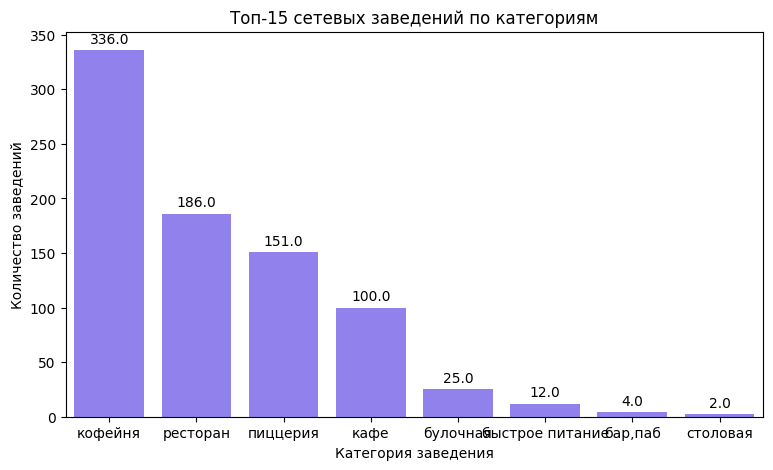

In [60]:
# Фильтрация сетевых заведений (chain == 1)
network_data = restorans[restorans['chain'] == 1]

# Подсчет количества заведений по сетям
network_count = network_data.groupby('name').size().reset_index(name='count')

# Выбор топ-15 сетевых заведений по количеству
top_15 = network_count.nlargest(15, columns='count')

# Группировка топ-15 заведений по категориям
top_15_grouped = top_15.merge(network_data[['name', 'category']], on='name', how='left')

# Построение графика с распределением по категориям
plt.figure(figsize=(9, 5))
ax=sns.countplot(x='category', data=top_15_grouped, order=top_15_grouped['category'].value_counts().index, color='#836FFF')

# Добавление меток данных над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='baseline', 
                fontsize=10, 
                color='black', 
                xytext=(0, 5), textcoords='offset points')  # Смещение текста по оси Y
                
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.title('Топ-15 сетевых заведений по категориям')
plt.show()

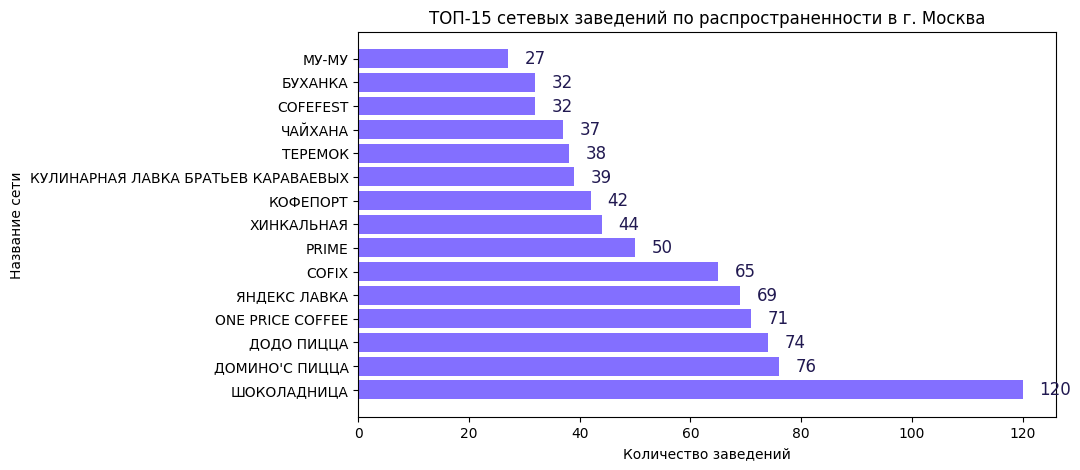

In [61]:
# Построение графика для топ-15 сетевых заведений
plt.figure(figsize=(9, 5))
plt.barh(top_15['name'], top_15['count'], color='#836FFF')

# Добавление меток данных
for i, v in enumerate(top_15['count']):
    plt.text(v + 3, i, str(v), color='#211951', fontsize=12, ha='left', va='center')

plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.title('ТОП-15 сетевых заведений по распространенности в г. Москва')
plt.show()

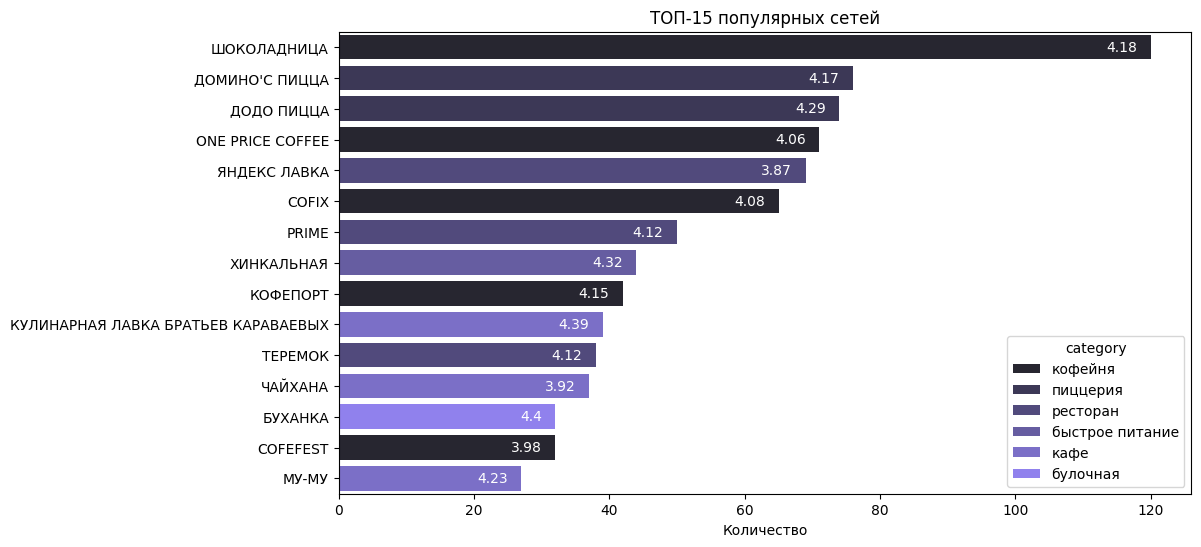

In [65]:
df_chain=restorans.loc[restorans['chain']==1]
group_by_chain = df_chain.groupby('name').agg({'category':'first','id':'count','rating':'mean'})
group_by_chain=group_by_chain.rename(columns={"id": "count"})
group_by_chain=group_by_chain.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(11, 6))
ax=sns.barplot(gr, x='count',y='name', hue='category',palette='dark:#836FFF')

# Подписываем и отображаем график
for index, row in gr.iterrows():
    ax.text(row['count'] - 2, index, round(row['rating'],2), 
            va='center', ha='right', fontsize=10, color='white')

plt.title('ТОП-15 популярных сетей')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

#####  Выводы:

Анализ распределения сетевых заведений в Москве показывает, что наибольшей популярностью пользуются кофейни, на примере таких сетей как "Шоколадница" (120 точек), "One Price Coffee" (71 точка). Вторыми по численности идут рестораны, пиццерии и кафе, среди которых выделяются сети "Доминос пицца" (76 точек), "Додо пицца" (74 точки) и "Му-му" (27 точек). Категории с наименьшим количеством представительств включают булочные ("Буханка"), фастфуды ("Cofefest") и бары ("Чайхана").

#####  8. Анализируем средний чек зеведения в зависимотси от района Москвы.


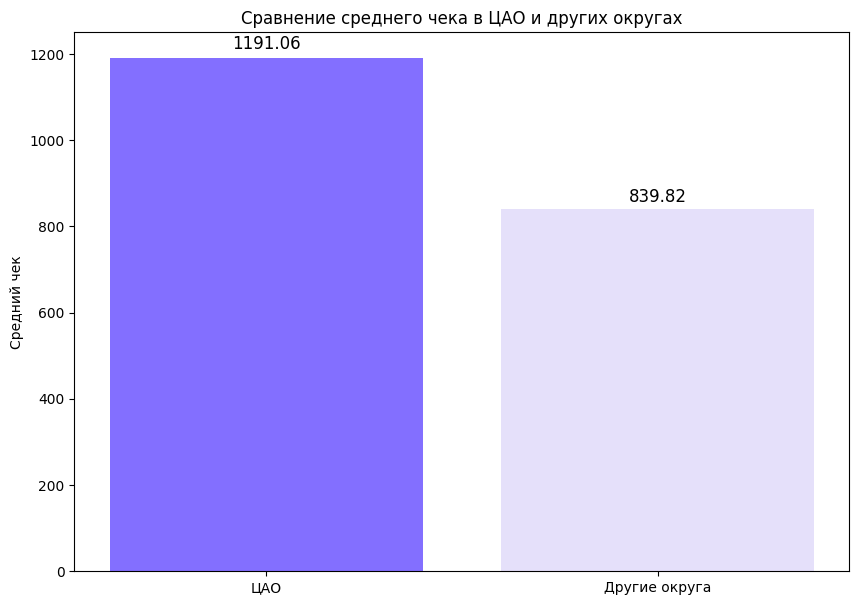

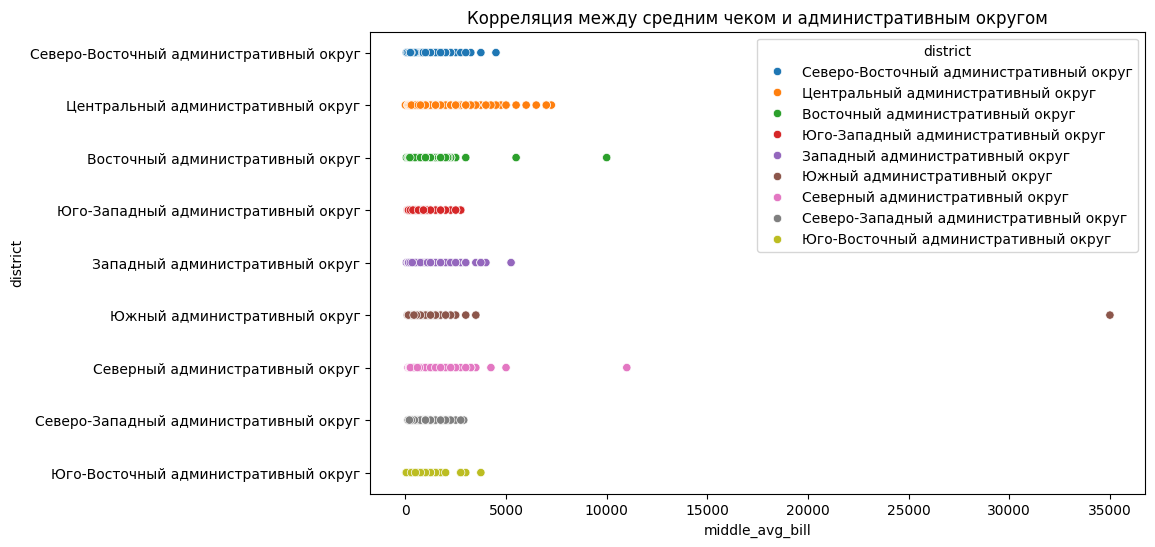

In [63]:

# Фильтрация данных по административным округам
cao_data = restorans[restorans['district'] == 'Центральный административный округ']
other_districts_data = restorans[restorans['district'] != 'Центральный административный округ']

# Расчёт среднего чека
cao_avg_bill = cao_data['middle_avg_bill'].mean()
other_avg_bill = other_districts_data['middle_avg_bill'].mean()

# Создание столбчатой диаграммы с метками данных
plt.figure(figsize=(10, 7))
bars = plt.bar(['ЦАО', 'Другие округа'], [cao_avg_bill, other_avg_bill], color=['#836FFF', '#E5E0FA'])
plt.title('Сравнение среднего чека в ЦАО и других округах')
plt.ylabel('Средний чек')

# Добавление меток данных на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height*1.01, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

# Диаграмма рассеяния для выявления корреляций
plt.figure(figsize=(10, 6))
sns.scatterplot(x='middle_avg_bill', y='district', hue='district', data=restorans)
plt.title('Корреляция между средним чеком и административным округом')
plt.show()

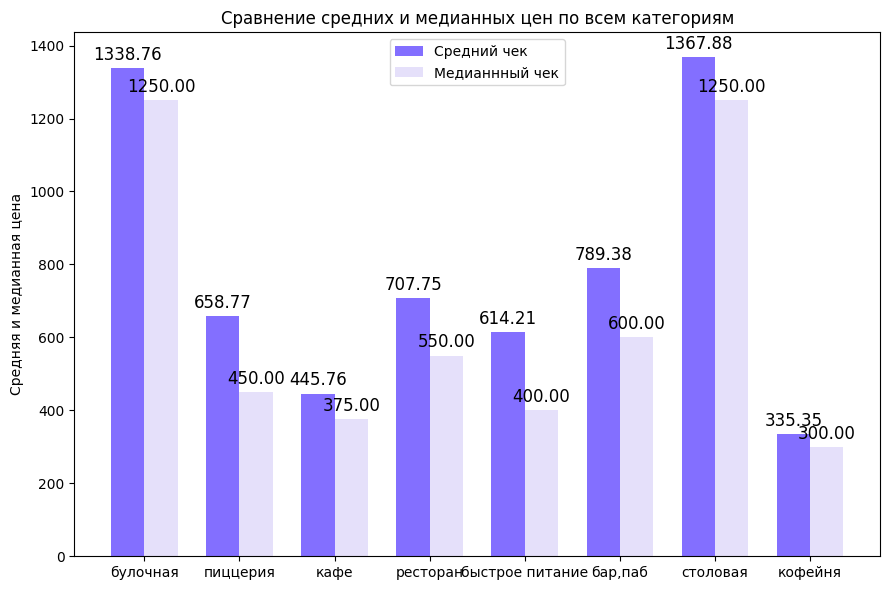

In [64]:
# Фильтруем данные по категориям
filtered_data = restorans[
    restorans['category'].isin([
        'булочная',
        'пиццерия',
        'кафе',
        'ресторан',
        'быстрое питание',
        'бар,паб',
        'столовая',
        'кофейня'
    ])
]

# Сортировка данных по среднему чеку
sorted_filtered_data = filtered_data.sort_values(by='middle_avg_bill', ascending=False)

# Вычисляем средний чек по категориям
all_categories_avg_bill = filtered_data.groupby('category')['middle_avg_bill'].mean().values

# Вычисляем медианный чек по категориям
all_categories_med_bill = filtered_data.groupby('category')['middle_avg_bill'].median().values

# Определяем список категорий
categories = [
    'булочная',
    'пиццерия',
    'кафе',
    'ресторан',
    'быстрое питание',
    'бар,паб',
    'столовая',
    'кофейня'
]

# Создаем массив позиций для категорий
x_pos = np.arange(len(categories))  
width = 0.35  # Ширина столбца

# Построение графика
fig, ax = plt.subplots(figsize=(9, 6))

# Столбцы для среднего чека
rects1 = ax.bar(x_pos - width/2, all_categories_avg_bill, width, label='Средний чек', color='#836FFF')

# Столбцы для медианного чека
rects2 = ax.bar(x_pos + width/2, all_categories_med_bill, width, label='Медианнный чек', color='#E5E0FA')

ax.set_ylabel('Средняя и медианная цена')
ax.set_title('Сравнение средних и медианных цен по всем категориям')
ax.set_xticks(x_pos)
ax.set_xticklabels(categories)
ax.legend()

# Функция добавления меток значений над столбцами
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 точки вверх от верхней части столбца
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

# Добавляем метки на столбцы
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

#####  Выводы:
Анализ показал, что средний чек в Центральном административном округе (ЦАО) составляет 1191,06 рублей, что существенно выше, чем в других административных округах Москвы, где средний чек равен 839,82 рубля. Таким образом, разница в среднем чеке между ЦАО и другими округами составляет примерно 351 рубль. Это подтверждает предположение о влиянии географического положения на уровень цен в заведениях общественного питания. Кроме того, выявлена корреляция между средним чеком и административным округом, что указывает на зависимость уровня цен от близости к центру города.



<div class="alert alert-block alert-success" ВЫВОДЫ И РЕКОМЕНДАЦИИ.


### Общие выводы и рекомендации.

#### Общий обзор проделанной работы

Работа включала загрузку и предварительный анализ данных о заведениях общественного питания в Москве. Данные содержат 8406 строк и 13 колонок, представляющих различные аспекты заведений, такие как название, адрес, категорию, график работы, количество мест, цену, средний чек и другие параметры. В ходе исследования были выполнены следующие этапы:

Предварительная обработка данных: Обнаружение и устранение пропущенных значений, нормализация данных, выявление дубликатов и создание новых признаков.
Исследовательский анализ: Исследование распределения заведений по категориям, административным округам, типу заведения (сетевое/несетевое), анализ среднего чека, рейтинга и других ключевых показателей.

#### Ответы на исследовательские вопросы

Распределение заведений по категориям: наиболее популярные категории — кафе, рестораны и кофейни. Меньшая распространенность характерна для баров, пиццерий и столовых.

Концентрация заведений по округам: центральный административный округ лидирует по числу заведений, значительно опережая остальные. Менее развиты Северо-Западный и Восточный округа.

Соотношение сетевых и несетевых заведений: несетевые заведения преобладают над сетевыми, особенно в категориях кафе, ресторанов и кофеен.

Посадочные места: вместимость заведений различается в зависимости от типа: рестораны, бары и столовые больше по размеру, тогда как булочные и пиццерии меньше.

Рейтинги заведений: различия в рейтингах незначительны, колеблясь в диапазоне от 4.05 до 4.39 баллов. Существенного влияния на рейтинг оказывают категория заведения и административное расположение.

__Корреляционные связи: наиболее сильные корреляции обнаружены между категорией заведений и признаком «сетевое/несетовое заведение» (0.27). Корреляция между категорией заведений и временем работы 24/7 составила 0.24, что также указывает на умеренную положительную зависимость. Слабое влияние оказывают количество посадочных мест и категория заведений - корреляция составила всего 0.05, что говорит о практически несущественной связи.__

Популярные сети: среди сетевых заведений популярны кофейни, такие как "Шоколадница" и "One Price Coffee", а также рестораны и пиццерии, включая "Доминос пицца" и "Додо пицца".

Средний чек: средний чек в Центральном административном округе значительно выше, чем в остальных районах, что связано с географическим положением и уровнем цен.

#### Рекомендации на основе анализа данных

Рекомендации для инвесторов из фонда Shut Up and Take My Money

1. Оптимальная концепция заведения: остановиться на формате кафе. Данный формат обладает наибольшей гибкостью и популярностью среди москвичей, позволяя обслуживать широкий спектр целевой аудитории — от семей и студентов до офисных сотрудников. Демократичная атмосфера и разнообразие меню позволят быстро занять нишу на рынке.

2. Стратегическое размещение.
При выборе локации предлагается обратить внимание на Северо-Западный или Восточный административные округа. Эти районы характеризуются низкой плотностью заведений общественного питания, что снижает уровень конкуренции и открывает перспективы для быстрого захвата рынка. При этом локация должна находиться в непосредственной близости к транспортным развязкам или густонаселенным жилым кварталам для обеспечения постоянного потока клиентов.

3. Определение ценовой стратегии.
Исходя из результатов анализа, оптимальный диапазон ценового сегмента — средний. Это позволит удовлетворить потребности основной массы потенциальных клиентов, обеспечивая баланс между качеством и стоимостью. Вместе с тем, включение в меню премиальных позиций даст возможность привлечь более требовательных гурманов и расширить доходность заведения.

4. Повышение качества обслуживания: учитывая небольшую разницу в рейтингах между различными типами заведений, улучшение сервиса и повышение удовлетворенности клиентов может стать ключевым фактором конкурентоспособности.

